# Obtaining the Renewable Energy and Weather Conditions dataset from kaggle
Here is the link : https://www.kaggle.com/datasets/samanemami/renewable-energy-and-weather-conditions

In [1]:
import pandas as pd

# Load the dataset (assuming it is in a CSV file)
data = pd.read_csv("solar_weather.csv")

# Inspect the first few rows of the dataset
data.head()

# Get the summary of the dataset to check for missing values and data types
# data.info()

data['Time'] = pd.to_datetime(data['Time'])


# Data Cleaning

In [2]:
# Drop any rows with missing values (you can also fill them with mean/median if necessary)
data = data.dropna()

# Normalize numeric features for better performance in machine learning
numeric_features = ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed',
                    'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 
                    'SunlightTime/daylength', 'hour', 'month']

# Normalize the numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Convert categorical variables to numeric (e.g., weather_type, isSun)
data['weather_type'] = data['weather_type'].astype('category').cat.codes
data['isSun'] = data['isSun'].astype('category').cat.codes

# Check the data after cleaning
print(data.head())


                 Time  Energy delta[Wh]  GHI      temp  pressure  humidity  \
0 2017-01-01 00:00:00               0.0  0.0  0.347328  0.628571       1.0   
1 2017-01-01 00:15:00               0.0  0.0  0.347328  0.628571       1.0   
2 2017-01-01 00:30:00               0.0  0.0  0.347328  0.628571       1.0   
3 2017-01-01 00:45:00               0.0  0.0  0.347328  0.628571       1.0   
4 2017-01-01 01:00:00               0.0  0.0  0.349237  0.614286       1.0   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0    0.342657      0.0      0.0         1.0      0           0.0        0.0   
1    0.342657      0.0      0.0         1.0      0           0.0        0.0   
2    0.342657      0.0      0.0         1.0      0           0.0        0.0   
3    0.342657      0.0      0.0         1.0      0           0.0        0.0   
4    0.363636      0.0      0.0         1.0      0           0.0        0.0   

   SunlightTime/daylength  weather_type      hour  month

# Correlation Matrix and Pairplot

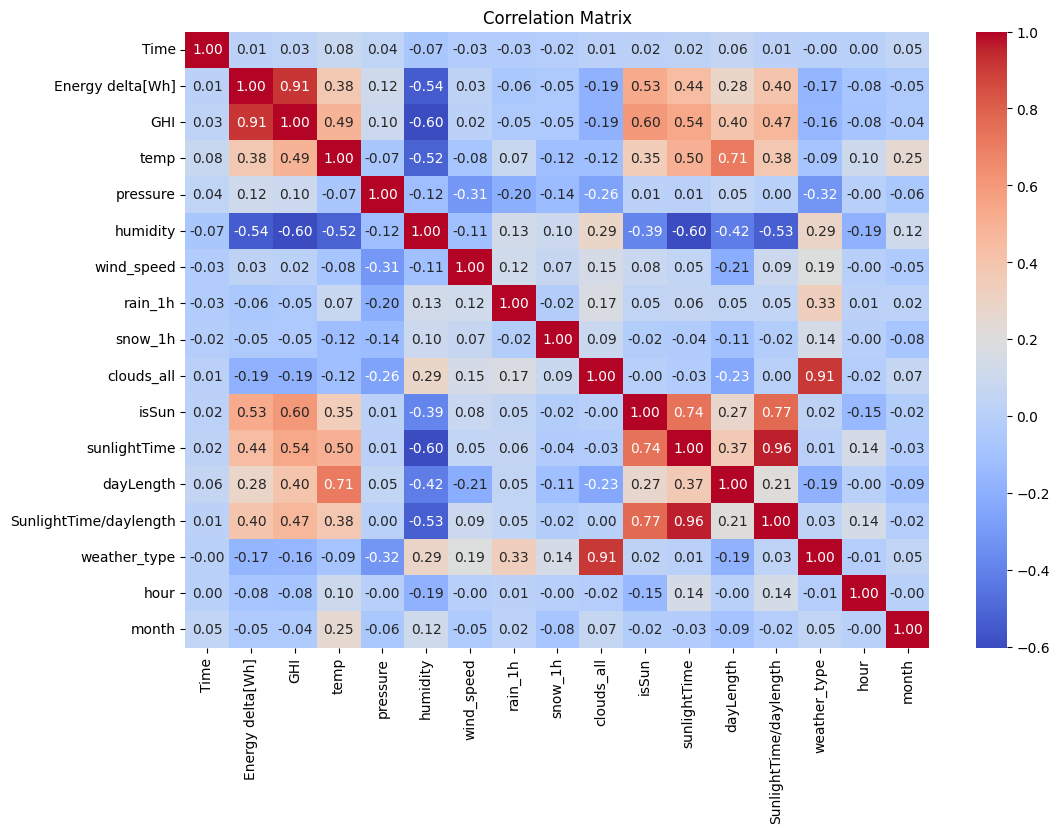

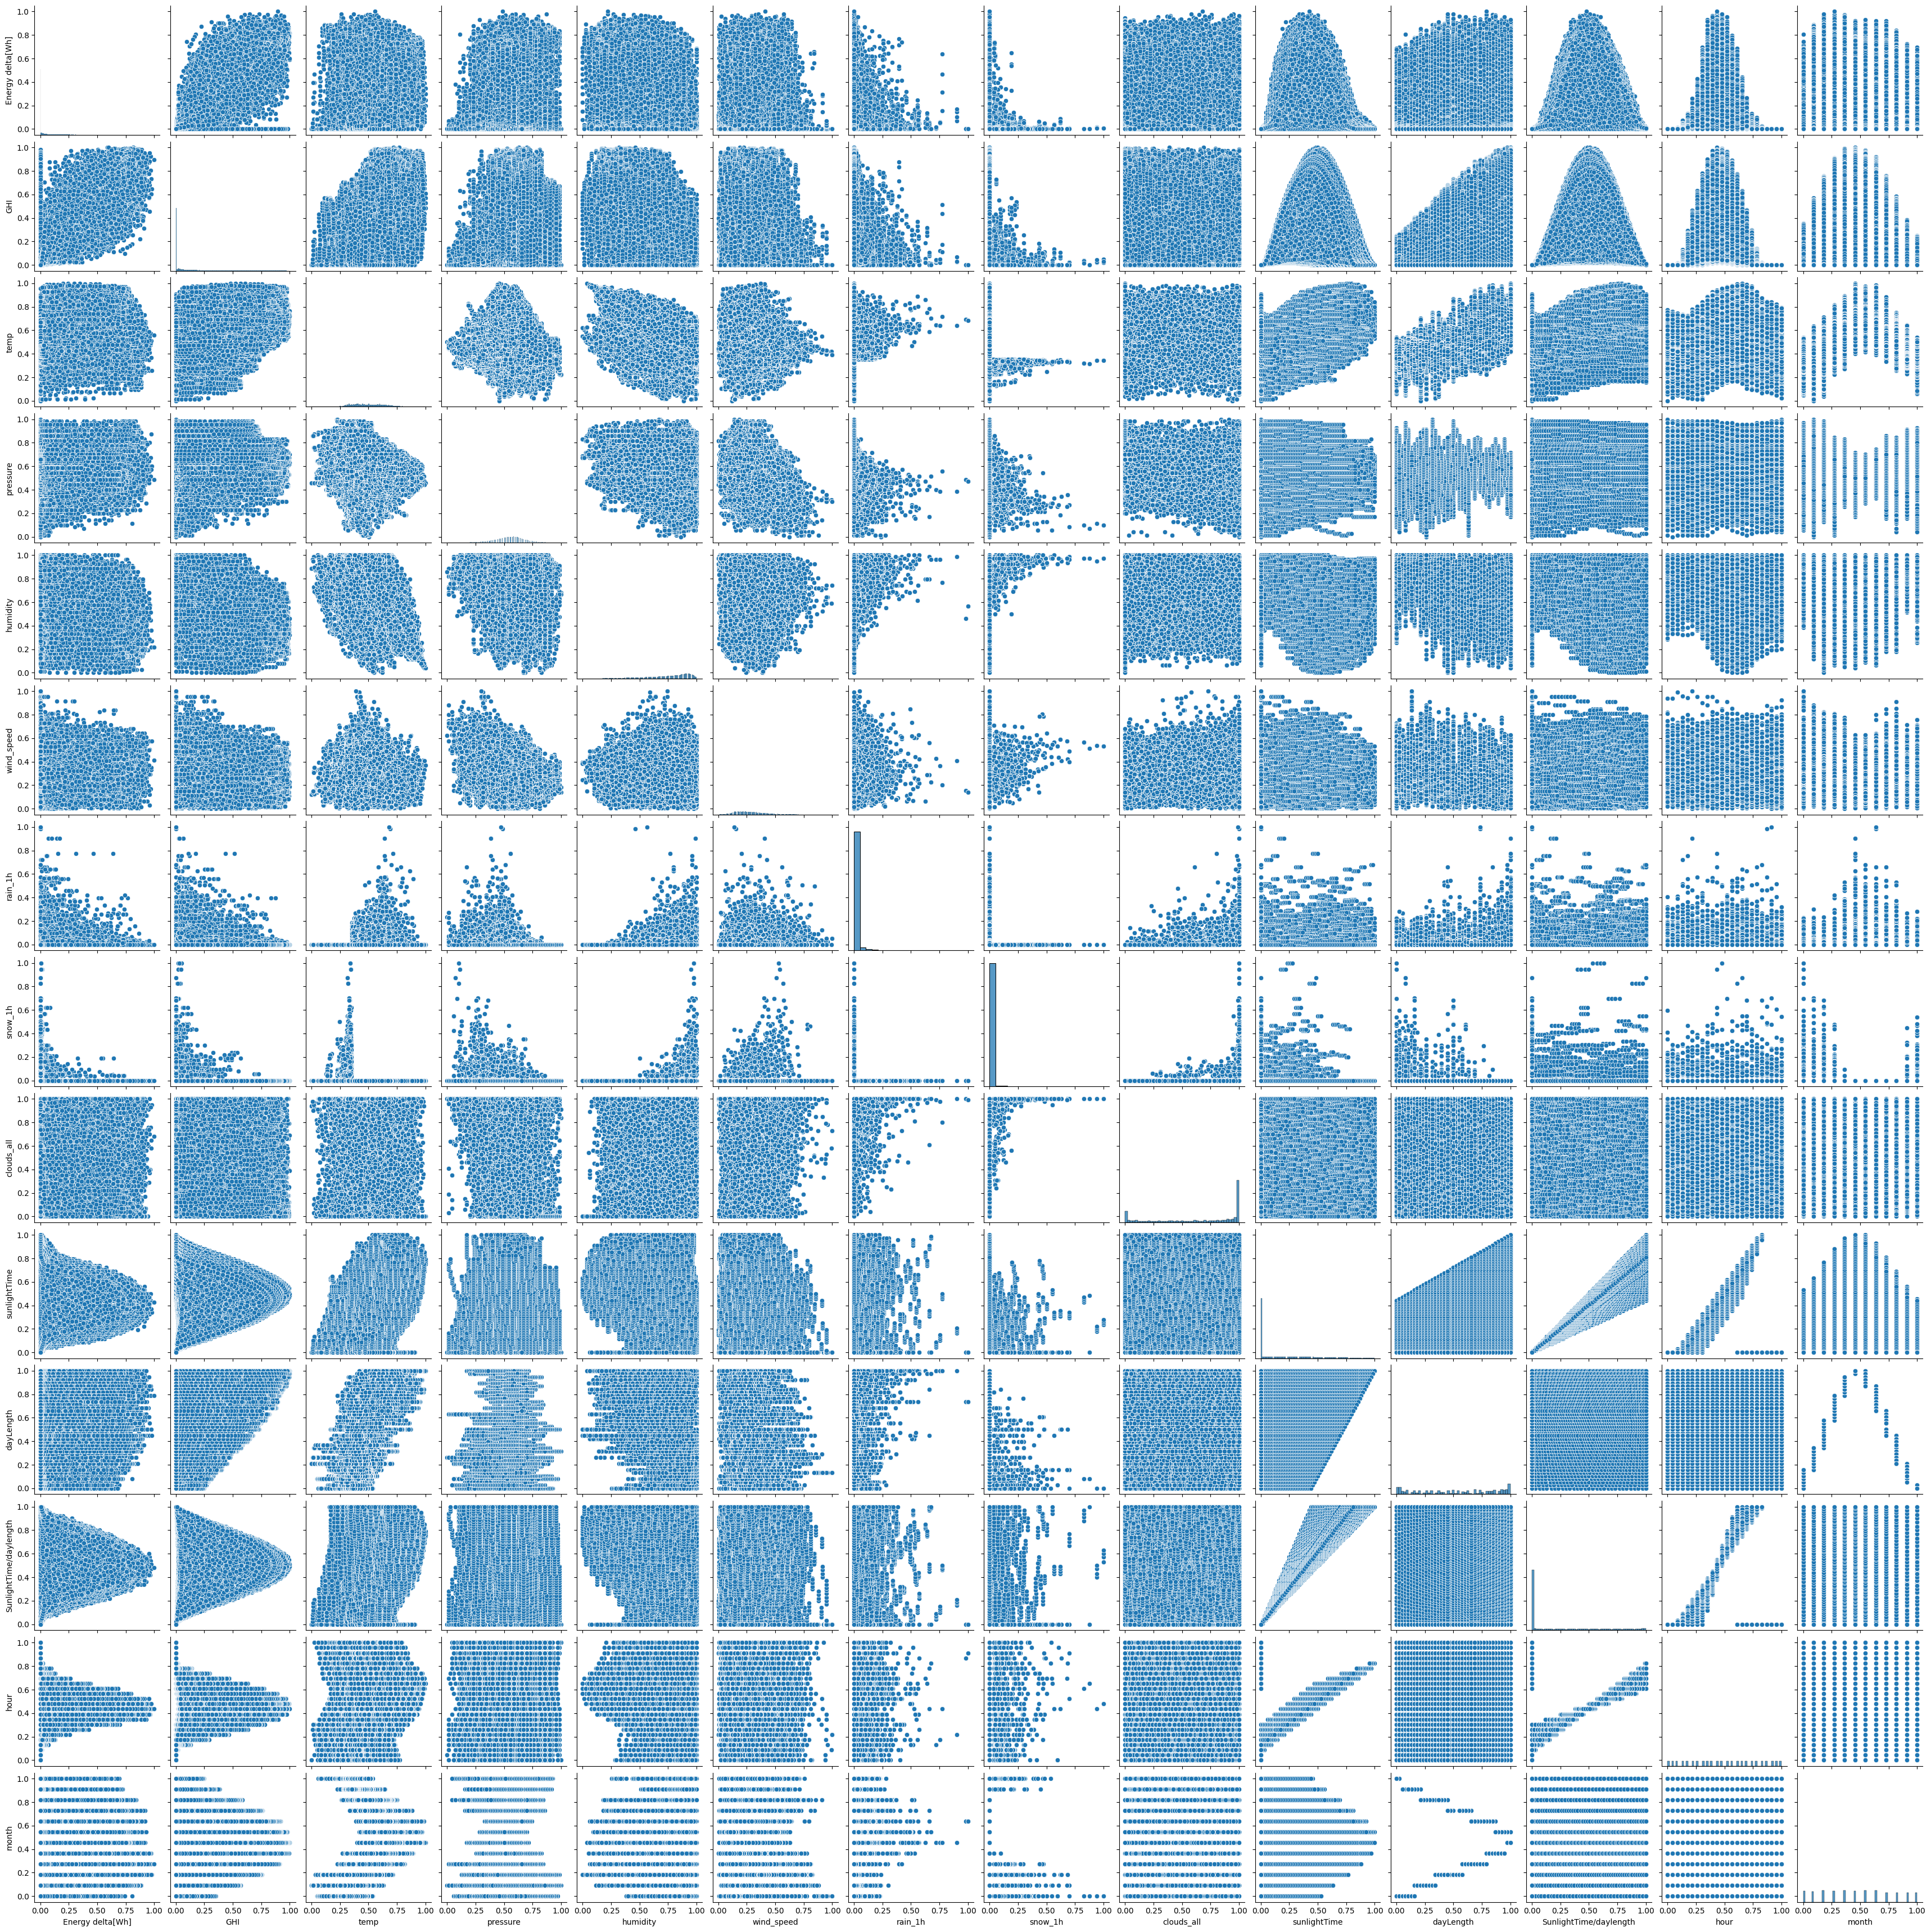

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlation matrix to understand relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# You can also visualize feature distributions to understand their spread
sns.pairplot(data[numeric_features])
plt.show()


# Simple Modeling Using MLPRegressor

Mean Squared Error (MSE): 5.684761336521595e-07
Mean Absolute Error (MAE): 0.0005837582909825272
R-squared (R²): 0.9999869995287698
Explained Variance Score (EVS): 0.9999920193757869
Root Mean Squared Error (RMSE): 0.0007539735629663414


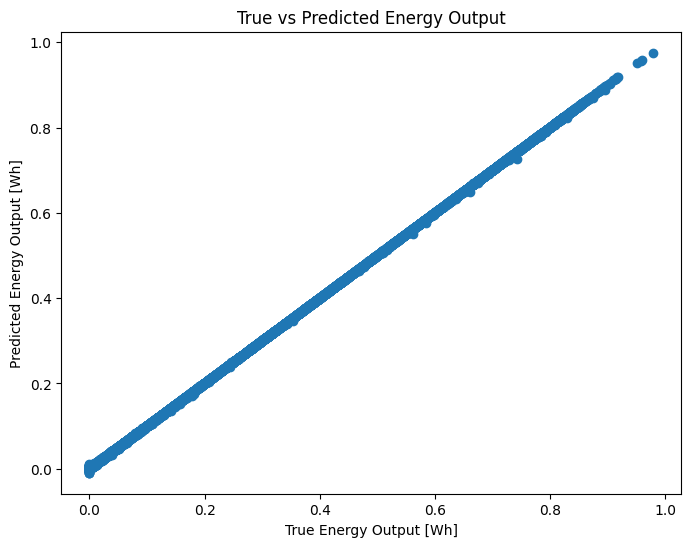

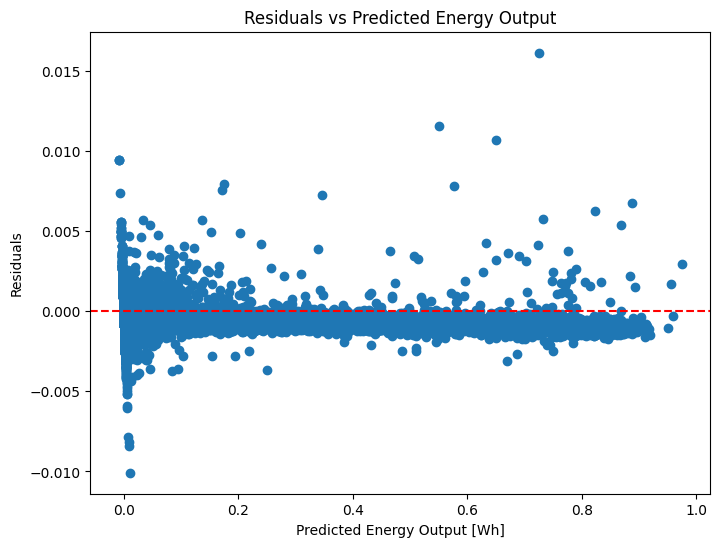

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Define features (X) and target (y)
X = data[numeric_features]
y = data['Energy delta[Wh]']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Neural Network Regressor (simulating a quantum neural network)
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, activation='relu', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model with multiple metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Explained Variance Score (EVS): {evs}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Energy Output [Wh]')
plt.ylabel('Predicted Energy Output [Wh]')
plt.title('True vs Predicted Energy Output')
plt.show()

# Plot residuals (difference between true and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Energy Output [Wh]')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Energy Output')
plt.show()


# Evaluate the Model

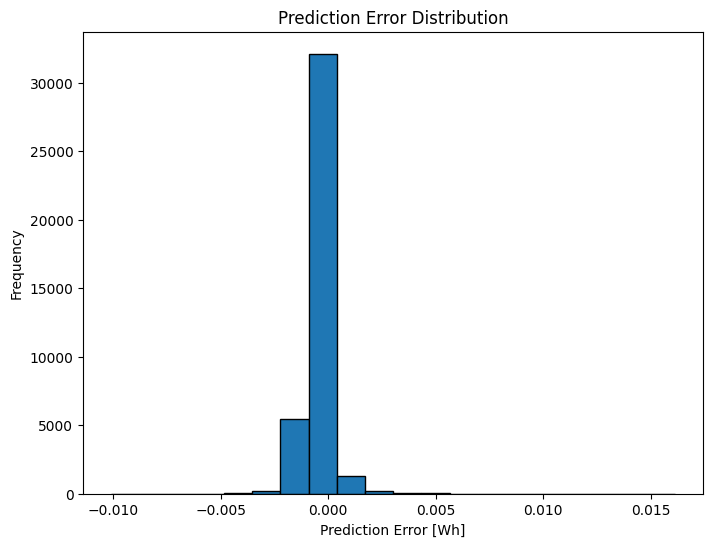

Model has a Mean Squared Error of: 5.684761336521595e-07
The model is attempting to predict the energy output based on weather and environmental features.


In [7]:
# Plot the error distribution
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel('Prediction Error [Wh]')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()

# Interpret the model performance
print(f"Model has a Mean Squared Error of: {mse}")
print("The model is attempting to predict the energy output based on weather and environmental features.")


# Saved the true and predicted values in a csv format

In [8]:
import pandas as pd

# Create a DataFrame with the true and predicted values
result_df = pd.DataFrame({
    'True Energy Output [Wh]': y_test,
    'Predicted Energy Output [Wh]': y_pred
})

# Save the results to a CSV file
result_df.to_csv('predicted_energy_output.csv', index=False)

print("Predicted results saved to 'predicted_energy_output.csv'")


Predicted results saved to 'predicted_energy_output.csv'


In [ ]:
model.coefs_

[array([[ 5.48223356e-003,  3.36490243e-001,  3.62698222e-210,
         -3.91027994e-226,  3.42353520e-002, -1.67188269e-001,
         -9.18292104e-002,  2.99765928e-001, -6.91720233e-003,
          1.04825072e-001, -3.09723382e-001,  3.45957181e-001,
          2.81761538e-001,  3.77089209e-203,  2.85290102e-002,
         -2.21559136e-002, -2.19477610e-002,  1.96965776e-002,
          2.86922303e-002, -1.63072403e-001,  5.69534800e-002,
         -1.51559207e-001, -2.20936847e-002,  3.22097663e-004,
         -3.21986019e-002,  3.51547736e-001,  9.74858786e-003,
         -4.42973109e-003, -4.84450649e-002, -2.71956698e-186,
          3.21263806e-225, -2.02187961e-001, -1.24902678e-002,
          3.64769761e-001,  2.30011581e-184,  6.80789815e-002,
         -9.36464746e-002, -1.41702420e-001,  1.28428279e-001,
         -7.98703287e-002, -2.64926143e-001,  2.46273131e-002,
          1.24995361e-003,  3.98737038e-001, -3.09274635e-002,
         -4.39823705e-003, -1.29297766e-001, -2.6802860

In [ ]:
model.intercepts_

[array([-0.13316284,  0.23217346, -0.27013793, -0.2299185 , -0.01107884,
        -0.25654543, -0.17882609,  0.0821561 , -0.07035819,  0.17097838,
         0.22180623, -0.07794903, -0.07701581, -0.06673464,  0.04022369,
        -0.17962676,  0.04887986, -0.02692453,  0.07213804, -0.00027446,
        -0.13095552,  0.25777315,  0.16949537, -0.18400334,  0.16988319,
         0.06399181,  0.22242413,  0.13661807, -0.04520559, -0.26488637,
        -0.12831471,  0.06149338,  0.04838676, -0.05228929, -0.20004926,
         0.16916883,  0.25351003,  0.02447877, -0.15713466, -0.10062021,
        -0.20866119,  0.18811342, -0.19428604,  0.12067432, -0.03394832,
         0.00682964,  0.09569601,  0.15967387, -0.12738859, -0.23336323,
        -0.1890567 ,  0.17322149,  0.22837419,  0.02713615,  0.02570643,
         0.08751336, -0.07210078,  0.21218449, -0.06358614, -0.08502305,
         0.05887032, -0.25129807, -0.18511268,  0.11678453]),
 array([ 0.07595189, -0.21261132,  0.02020934, -0.11987503, -0